Análise dos níveis da função de do servidores da FFLCH a partir dos dados do portal de transparência https://uspdigital.usp.br/portaltransparencia/ referente a setembro de 2024, somente foram exportados os ativos.

Obervação: programando por diversão, copiem os códigos e façam suas próprias análises

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# txt exportado do portal de transparência da USP
df = pd.read_csv('../data/2024/fflch-set-2024.txt',sep=';', encoding='latin-1',index_col=16) 

In [150]:
# filtrando apenas Celetistas e Autarquicos (Func Aut)
df = df[df['Categoria'].isin(['Celetista','Func Aut'])]

In [151]:
df.shape[0]

277

A FFLCH tem 277 funcionários, porém estão incluídos os que ingressaram em 2024, mas não vão participar da carreira. 

In [152]:
# ingressantes em 2024
df = df[~df['Data Ingresso/Aposentadoria'].str.contains('2024')]
df.shape[0]

269

Removendo os que ingressaram em 2024, ficamos com 269.

Quantidade de pessoas por nível considerando as letras:

In [153]:
todas_funcoes = df.groupby(['Classe', 'Ref/MS']).size()
todas_funcoes.to_frame('size')

size
Classe     Ref/MS      
Básico 1   A         13
           B          4
           C          3
           D          5
Básico 2   A         21
           B          7
Básico 3   A          7
           B          5
           C          1
Básico 4   A          1
Superior 1 A         15
           B          1
Superior 2 A          7
           B          1
Superior 3 A          5
           B          1
Superior 4 A          3
           B          2
Superior 5 A          1
Técnico 1  A         43
           B         15
           C          6
           D          8
Técnico 2  A         31
           B         15
           C          5
Técnico 3  A         25
           B          5
           C          1
Técnico 4  A         12

<Axes: title={'center': 'Quantidade de pessoas na FFLCH por nível considerando as letras'}, xlabel='Classe'>

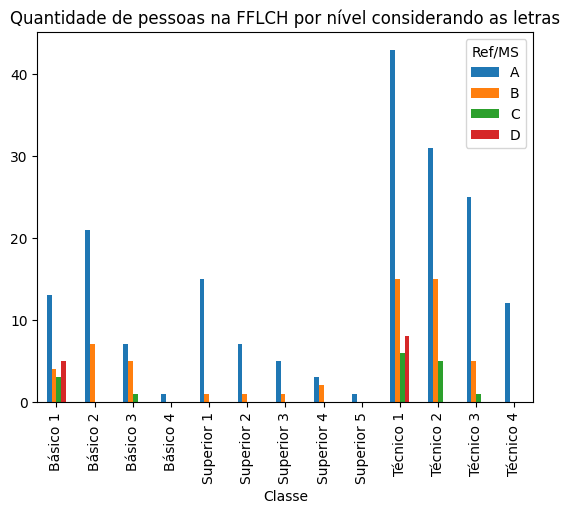

In [154]:
todas_funcoes.unstack().plot(kind = 'bar', title="Quantidade de pessoas na FFLCH por nível considerando as letras")

In [155]:
# Quantidade de pessoas por nível não considerando as letras:
todas_funcoes_vert = df.groupby('Classe').size()
todas_funcoes_vert.to_frame('size')

,size
Classe,
Básico 1,25
Básico 2,28
Básico 3,13
Básico 4,1
Superior 1,16
Superior 2,8
Superior 3,6
Superior 4,5
Superior 5,1


Text(0, 0.5, 'Quantidade de pessoas')

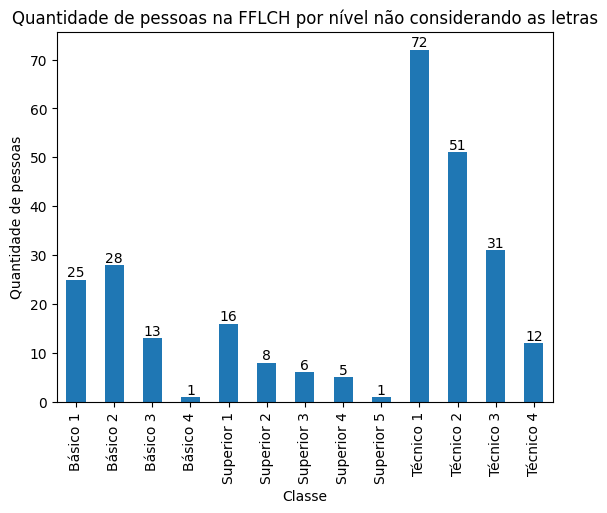

In [156]:
ax = todas_funcoes_vert.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de pessoas na FFLCH por nível não considerando as letras")
plt.ylabel("Quantidade de pessoas")

Selecionando apenas Básico 1, Técnico 1 e Superior 1 sem considerar as letras:

In [157]:
df_somente1 = df[df['Classe'].isin(['Básico 1','Técnico 1', 'Superior 1'])]

In [158]:
df_somente1_classes = df_somente1.groupby('Classe').size()
df_somente1_classes

Classe
Básico 1      25
Superior 1    16
Técnico 1     72
dtype: int64

Text(0, 0.5, 'Quantidade de pessoas')

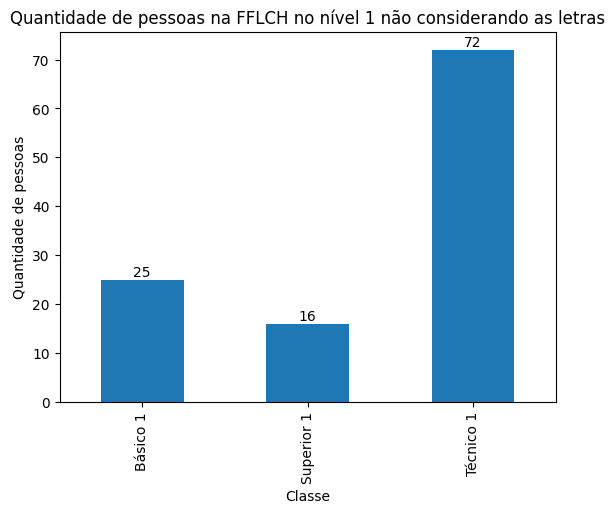

In [159]:
ax = df_somente1_classes.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Quantidade de pessoas na FFLCH no nível 1 não considerando as letras")
plt.ylabel("Quantidade de pessoas")